In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [83]:
data = pd.read_csv('housing.csv')

In [84]:
data.dropna(inplace=True)

In [85]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [87]:
train_data = X_train.join(y_train) # type: ignore

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

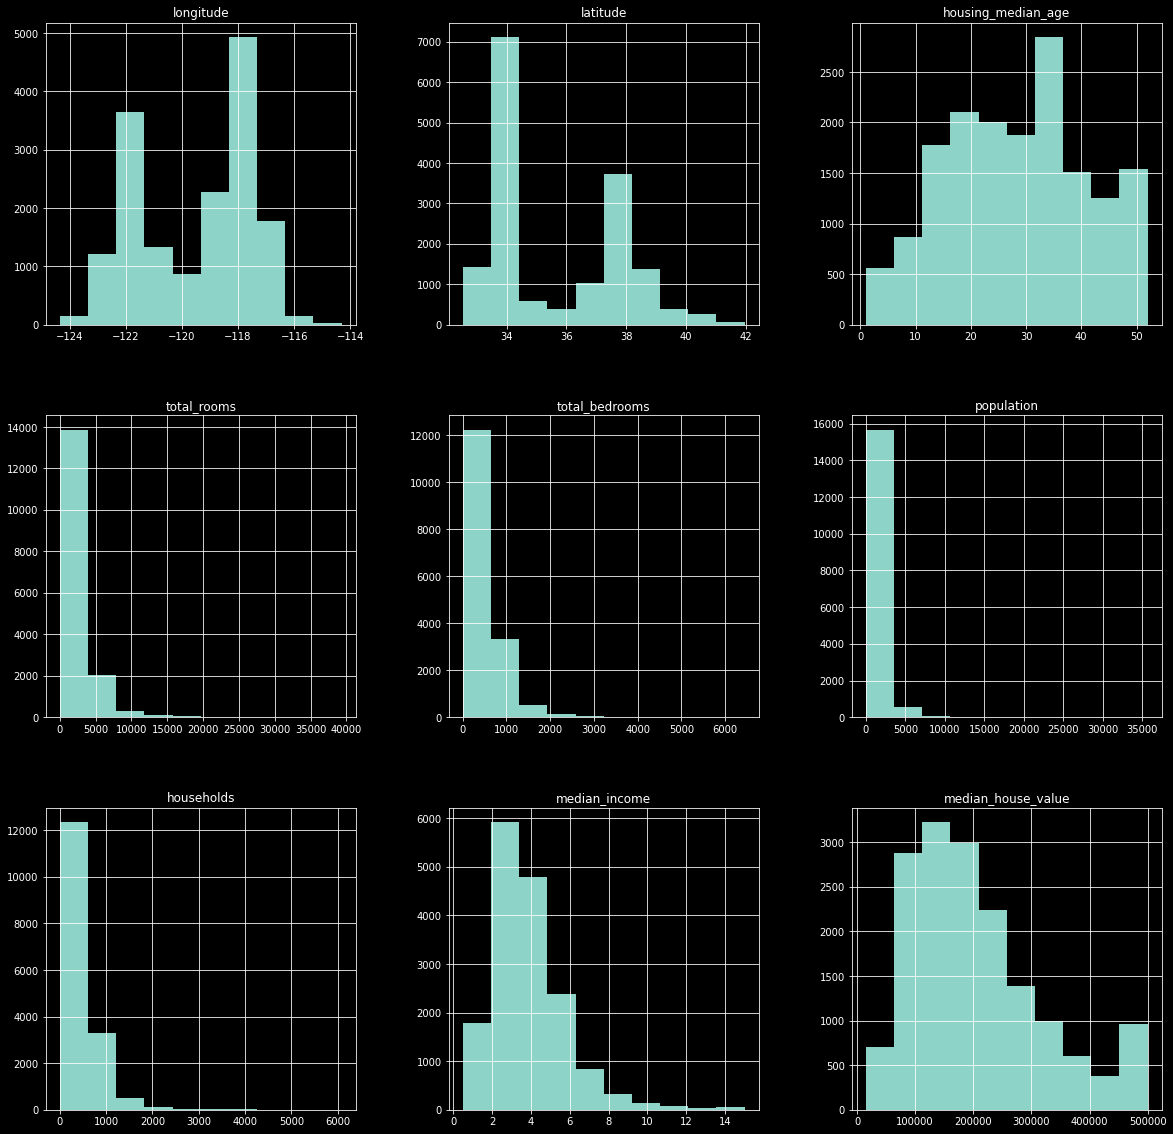

In [88]:
train_data.hist(figsize=(20,20))


<AxesSubplot:>

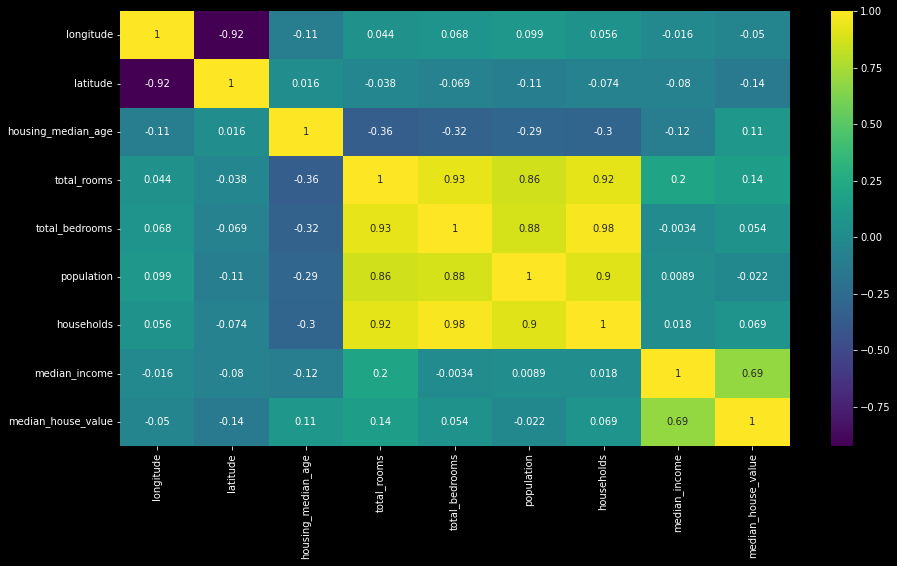

In [89]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='viridis')

In [90]:
train_data['total_rooms'] =np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] =np.log(train_data['total_bedrooms'] + 1)
train_data['population'] =np.log(train_data['population'] + 1)
train_data['households'] =np.log(train_data['households'] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

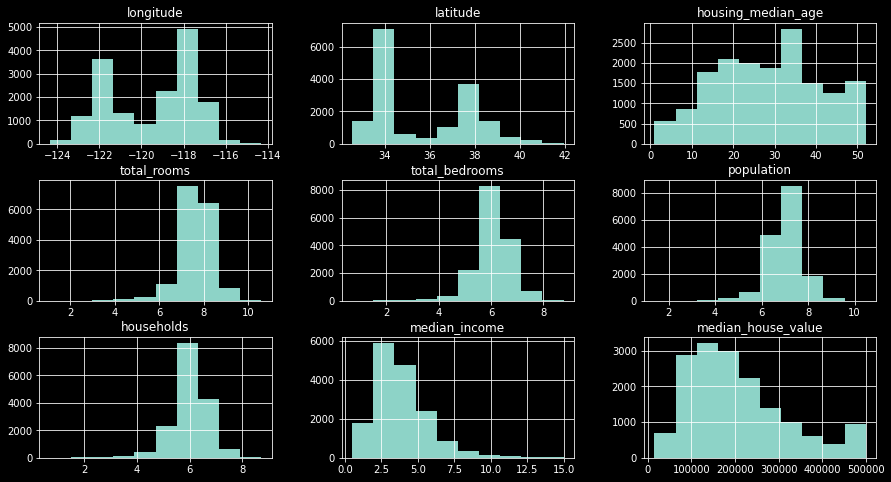

In [91]:
train_data.hist(figsize=(15,8))

In [92]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop('ocean_proximity',axis=1)

<AxesSubplot:>

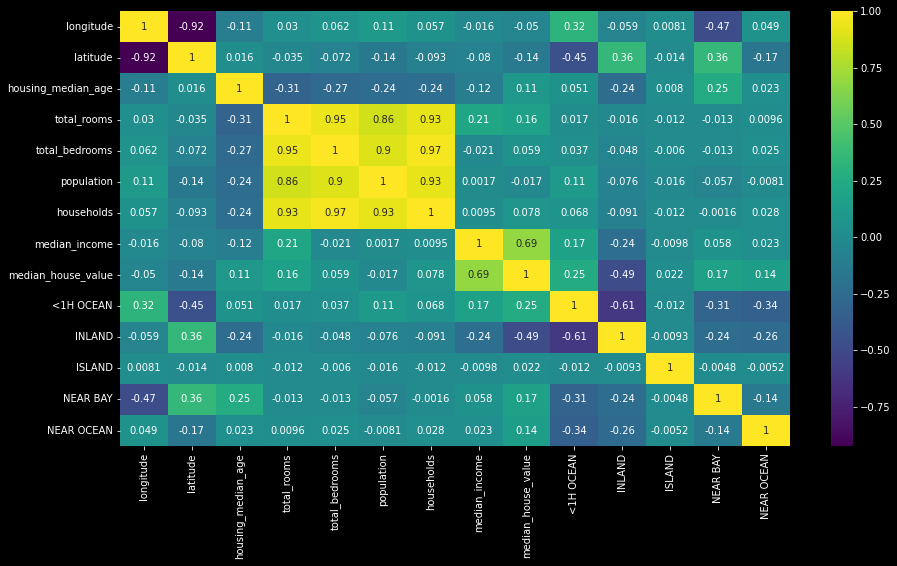

In [93]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='viridis')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

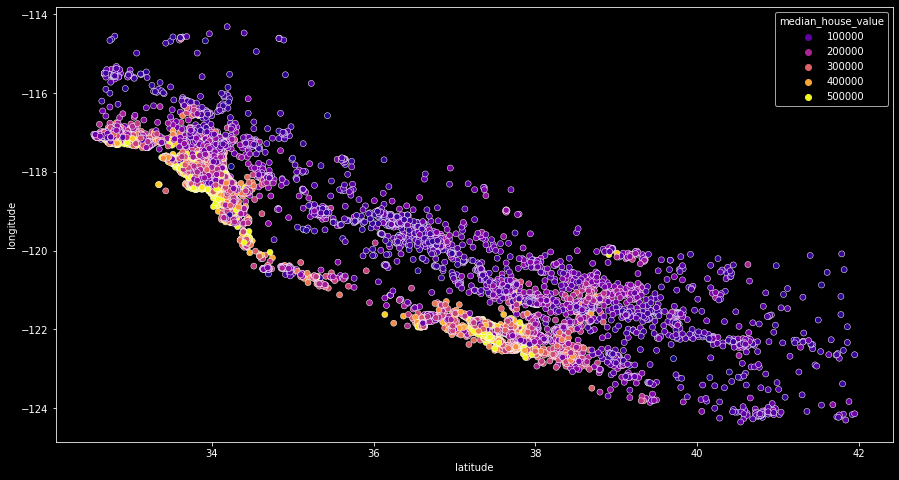

In [94]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='plasma')

In [104]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']


<AxesSubplot:>

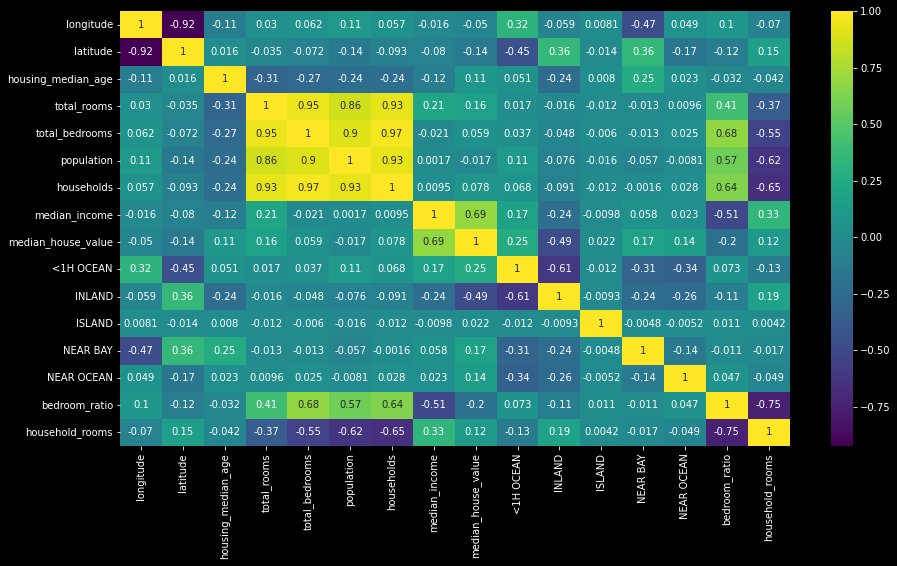

In [105]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='viridis')


In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']
X_train_s = StandardScaler().fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s,y_train)

LinearRegression()

In [123]:
test_data = X_test.join(y_test).dropna() # type: ignore

test_data['total_rooms'] =np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] =np.log(test_data['total_bedrooms'] + 1)
test_data['population'] =np.log(test_data['population'] + 1)
test_data['households'] =np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop('ocean_proximity',axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [126]:
x_test, y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']


In [134]:
x_test_s = StandardScaler().fit_transform(x_test)

In [135]:
reg.score(x_test_s,y_test)

-2.6321736534701916e+21

In [145]:
from sklearn.ensemble import RandomForestRegressor

f = RandomForestRegressor()

f.fit(X_train_s,y_train)


RandomForestRegressor()

In [146]:
f.score(x_test_s,y_test)

0.7977354730863656

In [155]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [3,10,30],
    'max_features': [8,12,20],
    "min_samples_split" :[ 2, 4, 6, 8, 10]
} 

grid = GridSearchCV(f,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

grid.fit(X_train_s,y_train)

In [ ]:
best_f = grid.best_estimator_

In [ ]:
best_f.score(x_test_s,y_test)

0.7938169990539202